**Using Kaggle to download Data**

In [ ]:
!pip install -q kaggle
import os
os.makedirs('/root/.kaggle/', exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d lainguyn123/student-performance-factors
!unzip student-performance-factors.zip

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 50.6MB/s]
Archive:  student-performance-factors.zip
  inflating: StudentPerformanceFactors.csv  


In [4]:
!ls

sample_data  StudentPerformanceFactors.csv  student-performance-factors.zip


**Importing** **Data**

In [139]:
import pandas as pd
df=pd.read_csv('StudentPerformanceFactors.csv')

#printing first 5 rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Data** **Preprocessing**

In [140]:
#selecting particular features
studfactors=['Hours_Studied','Parental_Involvement','Attendance','Access_to_Resources','Sleep_Hours','Physical_Activity','Internet_Access','Previous_Scores','Tutoring_Sessions','Learning_Disabilities','Exam_Score']
dataf=df[studfactors]

#printing the number of rows and columns in new dataframe
dataf.shape

(6607, 11)

In [141]:
dataf.isnull().any()

,0
Hours_Studied,False
Parental_Involvement,False
Attendance,False
Access_to_Resources,False
Sleep_Hours,False
Physical_Activity,False
Internet_Access,False
Previous_Scores,False
Tutoring_Sessions,False
Learning_Disabilities,False


In [162]:
#to consider rows with marks between 0 and 100
dataf=dataf[(dataf['Exam_Score'] >= 0) & (dataf['Exam_Score'] <= 100)]

dataf.describe()

,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Hours_Studied,Attendance,Sleep_Hours,Physical_Activity,Previous_Scores,Tutoring_Sessions,Exam_Score
count,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000,6605.000000
mean,0.299016,0.198637,0.502347,0.075397,0.924603,0.894777,0.105223,0.288872,0.202271,0.508857,19.975019,79.976684,7.028917,2.967449,75.064951,1.493414,67.231037
std,0.457861,0.399005,0.500032,0.264052,0.264052,0.306864,0.306864,0.453273,0.401724,0.499959,5.990565,11.545990,1.468088,1.031309,14.398389,1.229863,3.868591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,4.000000,0.000000,50.000000,0.000000,55.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,70.000000,6.000000,2.000000,63.000000,1.000000,65.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,20.000000,80.000000,7.000000,3.000000,75.000000,1.000000,67.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,24.000000,90.000000,8.000000,4.000000,88.000000,2.000000,69.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000,100.000000,10.000000,6.000000,100.000000,8.000000,100.000000


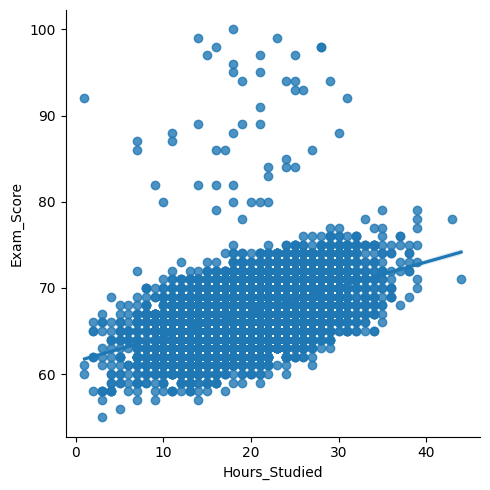

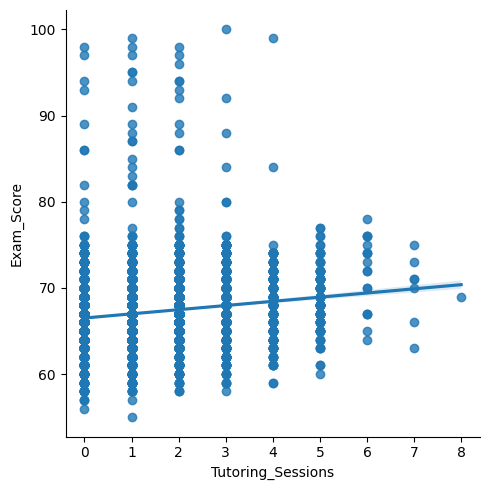

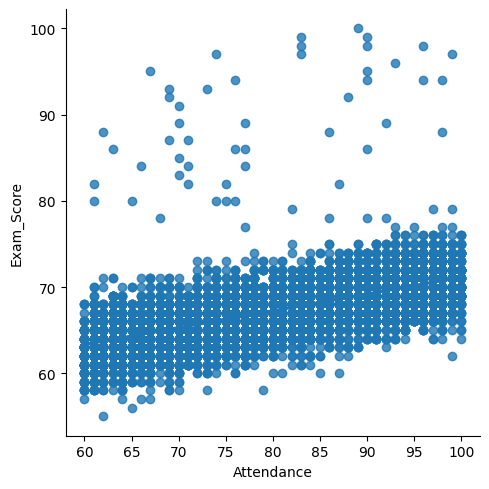

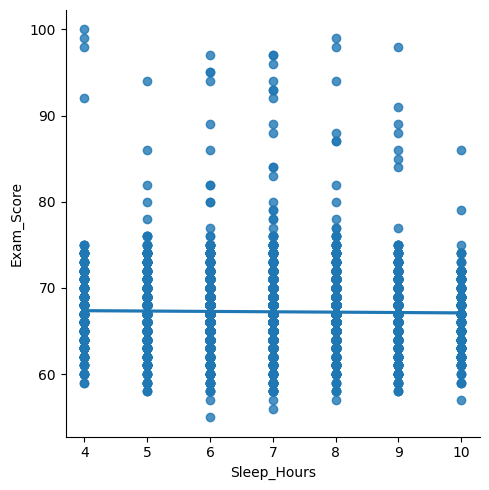

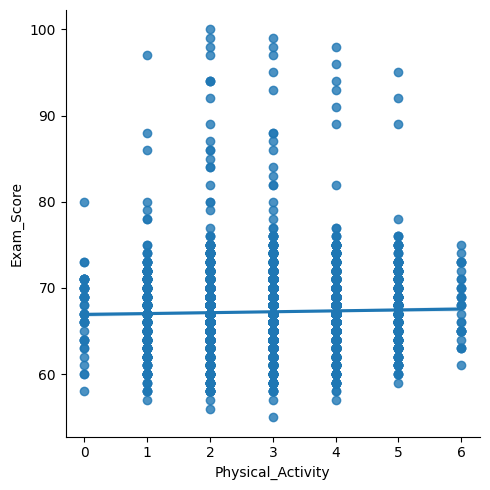

In [143]:
import seaborn as sns
sns.lmplot(x= 'Hours_Studied', y = 'Exam_Score',data=dataf)
sns.lmplot(x= 'Tutoring_Sessions', y = 'Exam_Score',data=dataf)
sns.lmplot(x= 'Attendance', y = 'Exam_Score',data=dataf)
sns.lmplot(x= 'Sleep_Hours', y = 'Exam_Score',data=dataf)
sns.lmplot(x = 'Physical_Activity', y = 'Exam_Score', data = dataf)

From the above it is clear that Exam_Score has an almost linear relation with Attendance, Hours_Studied, Previous_Scores and Tutoring_Sessions where as with respect to Sleep_Hours it does not show a clear linear relation

<Axes: >

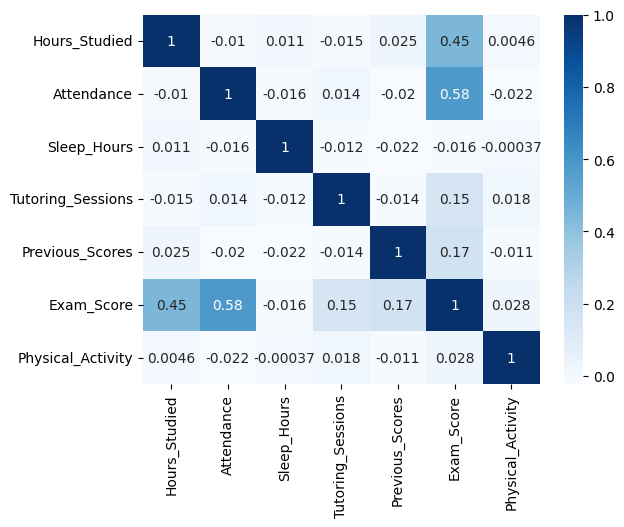

In [144]:
sns.heatmap(dataf[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions','Previous_Scores','Exam_Score','Physical_Activity']].corr(), cmap='Blues', annot=True)

From the above Sleep_Hours column does not contribute significantly

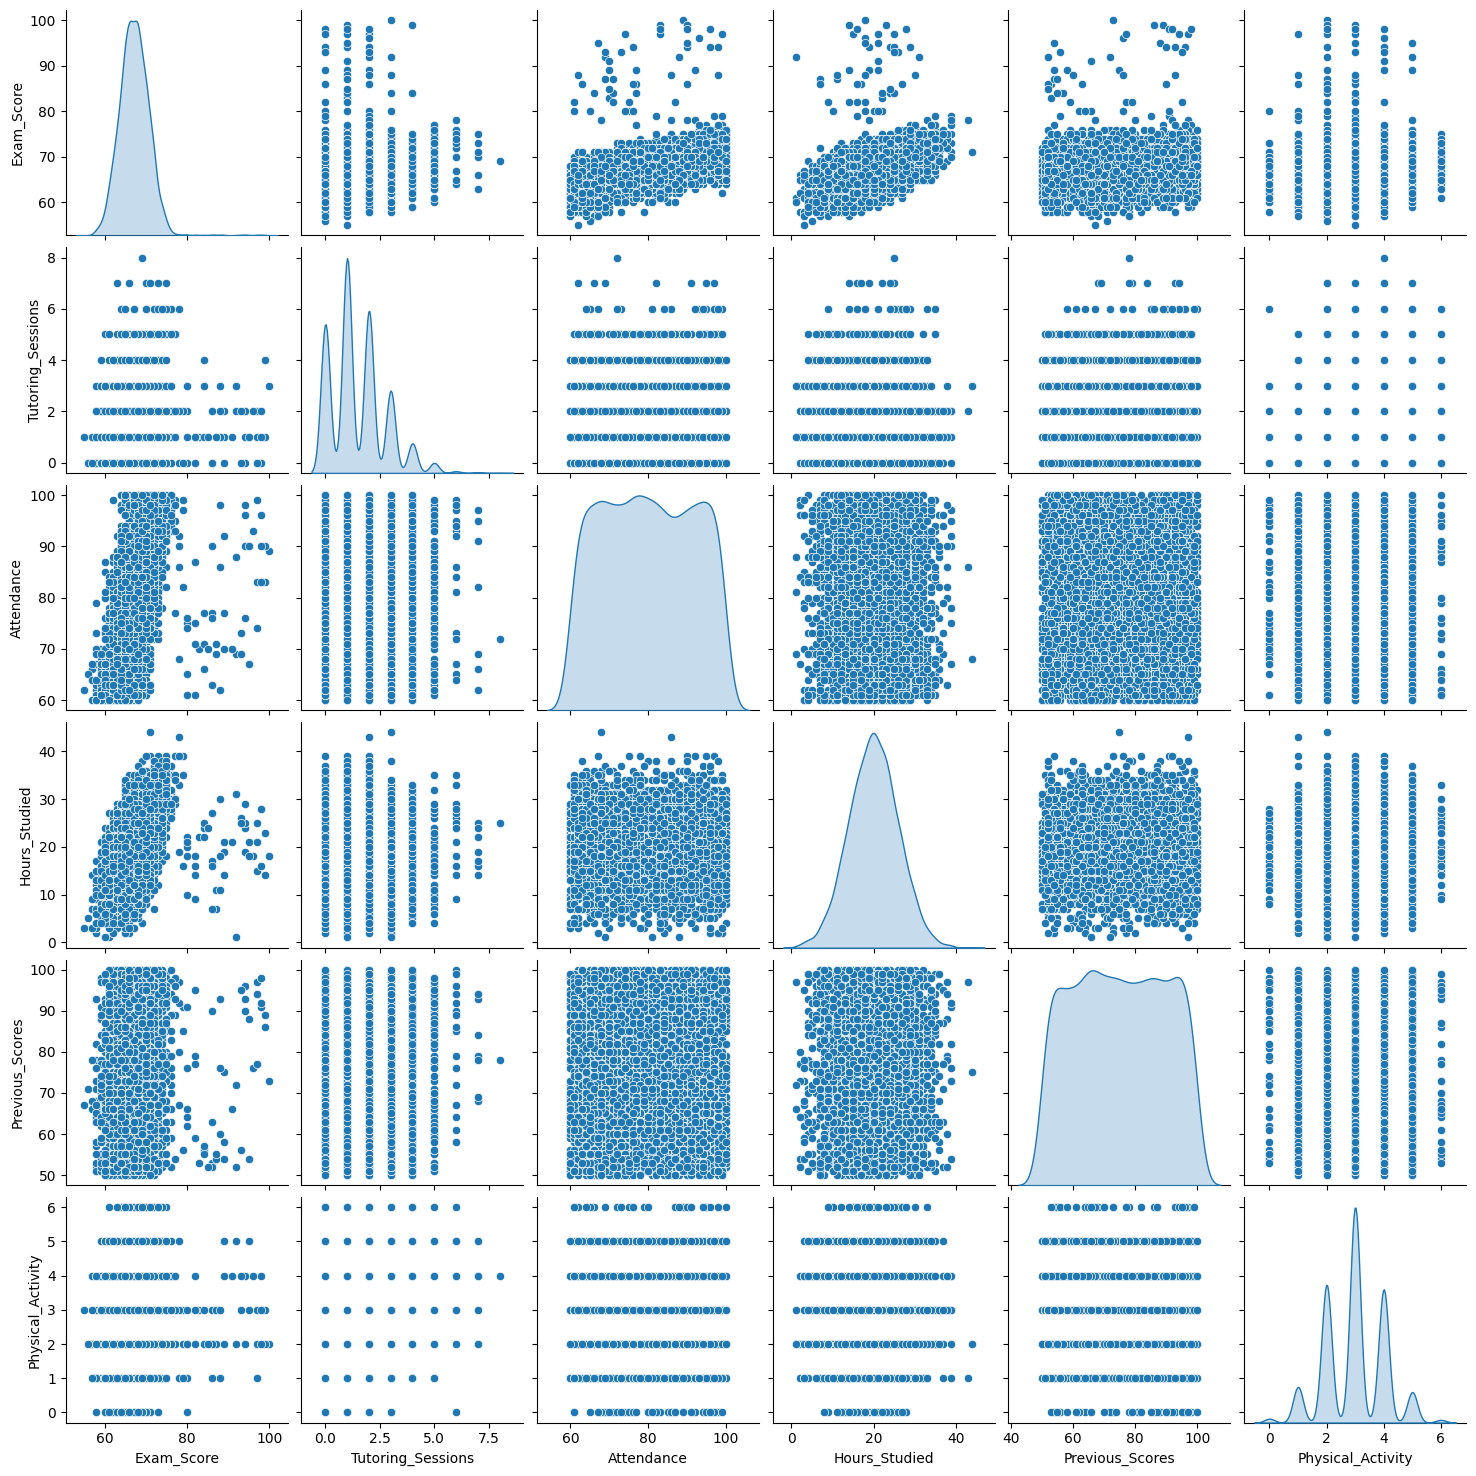

In [160]:
import seaborn as sns
sns.pairplot(dataf[['Exam_Score','Tutoring_Sessions','Attendance','Hours_Studied','Previous_Scores','Physical_Activity']], diag_kind= 'kde')

In [145]:
#library necessary for preprocessing
from sklearn.preprocessing import OneHotEncoder

#to convert text data to number so that it is easier to understand
#converts into an array/matrix of binary type
encoder=OneHotEncoder(sparse=False)
cat_col=['Access_to_Resources','Internet_Access','Learning_Disabilities','Parental_Involvement']

#Encode Categorical Values
dataf_encoded=pd.DataFrame(encoder.fit_transform(dataf[cat_col]))
dataf_encoded.columns=encoder.get_feature_names_out(cat_col)

#Replacing Text values with Numerical Values
dataf=dataf.drop(cat_col,axis=1)
dataf=pd.concat([dataf_encoded,dataf],axis=1)

#Encoding target values
#dataf['Exam_Score']=dataf['Exam_Score'].apply( lambda x: 1 if x>= 75 else 0)
#print("Shape of dataframe")
#dataf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [146]:
dataf.isnull().any()

,0
Access_to_Resources_High,True
Access_to_Resources_Low,True
Access_to_Resources_Medium,True
Internet_Access_No,True
Internet_Access_Yes,True
Learning_Disabilities_No,True
Learning_Disabilities_Yes,True
Parental_Involvement_High,True
Parental_Involvement_Low,True
Parental_Involvement_Medium,True


In [147]:
dataf.tail()

,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Hours_Studied,Attendance,Sleep_Hours,Physical_Activity,Previous_Scores,Tutoring_Sessions,Exam_Score
6602,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,25.0,69.0,7.0,2.0,76.0,1.0,68.0
6603,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,23.0,76.0,8.0,2.0,81.0,3.0,69.0
6604,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,20.0,90.0,6.0,2.0,65.0,3.0,68.0
6605,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10.0,86.0,6.0,3.0,91.0,2.0,68.0
6606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,67.0,9.0,4.0,94.0,0.0,64.0


In [148]:
dataf.dropna(inplace=True)

In [149]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
dataf_final=dataf.drop('Sleep_Hours',axis=1)

#Features Data
feature=dataf_final.drop('Exam_Score',axis=1)

#Selecting Target data
target=dataf_final['Exam_Score']

#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(feature, target, shuffle =True, test_size=0.2, random_state=1)

#Displaying training and  testing data
print("Shape of training feature: ",X_train.shape)
print("Shape of testing feature: ",X_test.shape)
print("Shape of training label: ",y_train.shape)

Shape of training feature:  (5284, 15)
Shape of testing feature:  (1321, 15)
Shape of training label:  (5284,)


In [150]:
#Scaling numeric features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
numeric=['Hours_Studied', 'Attendance','Physical_Activity','Previous_Scores','Tutoring_Sessions']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

**Training the Model**

In [157]:
#function to evaluate the models efficiency parameters
def evaluate_model(model,X_test, y_test):
  from sklearn import metrics
  import numpy as np

  #predicting test data
  y_pred=model.predict(X_test)

  rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  r2=metrics.r2_score(y_test,y_pred)
  mae = metrics.mean_absolute_error(y_test,y_pred)
  return{'rmse':rmse, 'r2':r2, 'mae':mae}

In [158]:
#multiple linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)
evaluate_model(regressor,X_test,y_test)

{'rmse': 2.5521159591341256,
 'r2': 0.563664795340187,
 'mae': 1.3253808667676004}

In [159]:
#decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
d_regressor = DecisionTreeRegressor()
d_regressor.fit(X_train, y_train)
d_regressor.score(X_test,y_test)
evaluate_model(d_regressor,X_test,y_test)

{'rmse': 3.5223950973452234,
 'r2': 0.16881904469119935,
 'mae': 2.098410295230886}

Multiple Linear Regression gives better results in this case than Decision Tree Regression